In [1]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Insurance Claim.csv')

# Display the first few rows of the dataset
data.head()


,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
# Check for null values in the dataset
null_counts = data.isnull().sum()

null_counts

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [4]:
# Drop rows containing null values
cleaned_data = data.dropna()

# Check the shape of the dataset before and after dropping null values
original_shape = data.shape
cleaned_shape = cleaned_data.shape

original_shape, cleaned_shape

((1340, 11), (1332, 11))

In [5]:
# Drop the first two columns
cleaned_data = cleaned_data.drop(columns=['index', 'PatientID'])

# Display the first few rows of the updated dataset
cleaned_data.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,30.0,male,53.1,97,No,0,No,northwest,1163.46


In [8]:
# Encode the categorical columns using one-hot encoding
encoded_data = pd.get_dummies(cleaned_data, columns=['gender', 'diabetic', 'smoker', 'region'], dtype=float,drop_first=True)
# Display the first few rows of the encoded dataset
encoded_data.head()

,age,bmi,bloodpressure,children,claim,gender_male,diabetic_Yes,smoker_Yes,region_northwest,region_southeast,region_southwest
0,39.0,23.2,91,0,1121.87,1.0,1.0,0.0,0.0,1.0,0.0
1,24.0,30.1,87,0,1131.51,1.0,0.0,0.0,0.0,1.0,0.0
7,19.0,41.1,100,0,1146.80,1.0,0.0,0.0,1.0,0.0,0.0
8,20.0,43.0,86,0,1149.40,1.0,0.0,0.0,1.0,0.0,0.0
9,30.0,53.1,97,0,1163.46,1.0,0.0,0.0,1.0,0.0,0.0


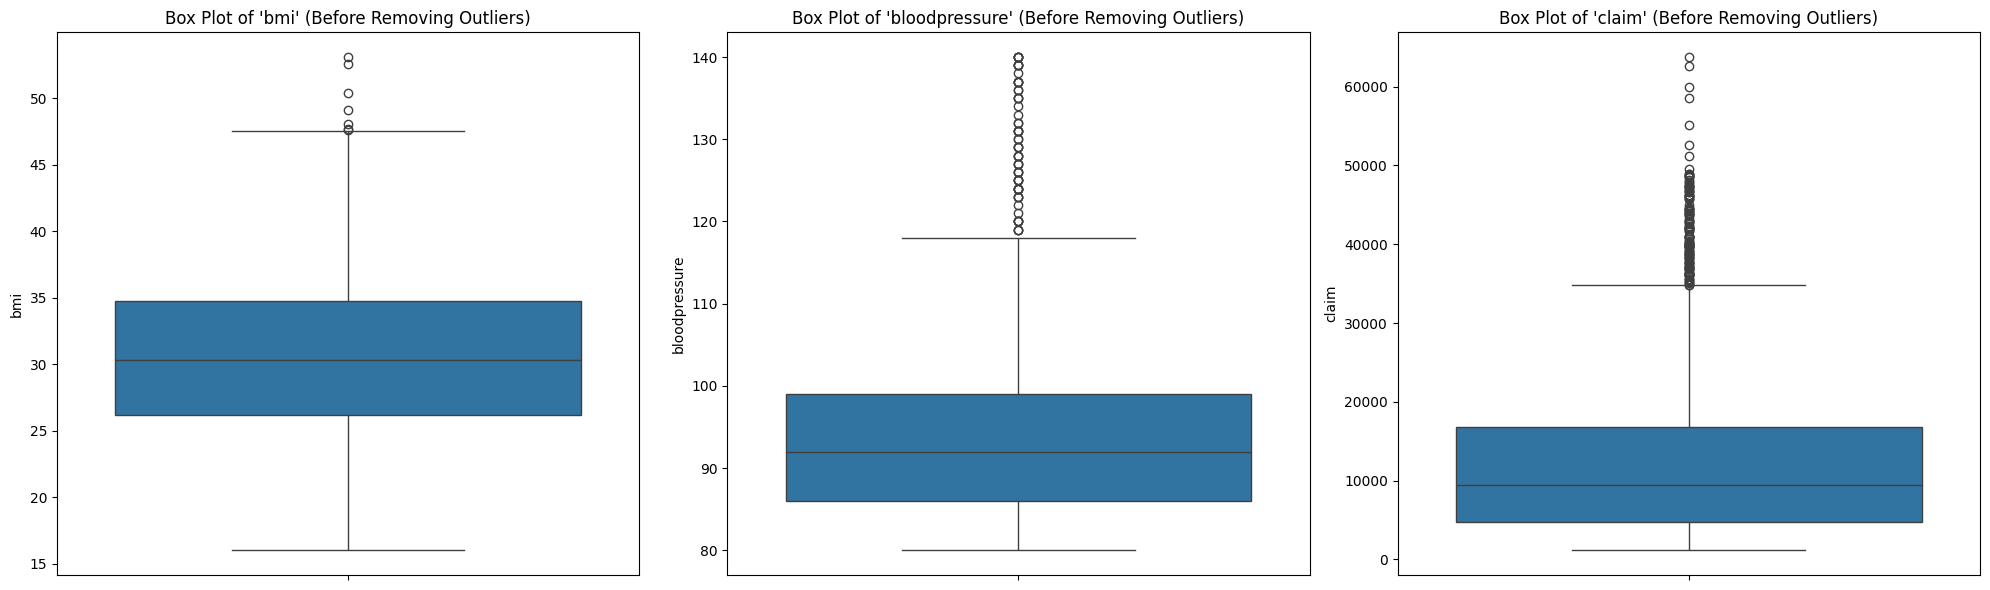

In [18]:
# Set up the figure and axes , box plot

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot box plot for 'bmi'
sns.boxplot(y=encoded_data['bmi'], ax=axes[0])
axes[0].set_title("Box Plot of 'bmi' (Before Removing Outliers)")
axes[0].set_ylabel('bmi')

# Plot box plot for 'bloodpressure'
sns.boxplot(y=encoded_data['bloodpressure'], ax=axes[1])
axes[1].set_title("Box Plot of 'bloodpressure' (Before Removing Outliers)")
axes[1].set_ylabel('bloodpressure')

# Plot box plot for 'claim'
sns.boxplot(y=encoded_data['claim'], ax=axes[2])
axes[2].set_title("Box Plot of 'claim' (Before Removing Outliers)")
axes[2].set_ylabel('claim')

plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import zscore

# Calculate Z-scores for 'bmi', 'bloodpressure', and 'claim'
z_scores_bmi = zscore(encoded_data['bmi'])
z_scores_bp = zscore(encoded_data['bloodpressure'])
z_scores_claim = zscore(encoded_data['claim'])

# Filter the data to remove outliers based on all three columns
filtered_data_all = encoded_data[
    (abs(z_scores_bmi) <= 3) & 
    (abs(z_scores_bp) <= 3) & 
    (abs(z_scores_claim) <= 3)
]

# Check the shape of the dataset before and after removing outliers
filtered_all_shape = filtered_data_all.shape

filtered_all_shape

(1289, 11)

In [28]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming you have already defined your independent variables (X), the original dependent variable (y), and have fitted your model
X = filtered_data_all[['bmi', 'bloodpressure', 'smoker_Yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = filtered_data_all['claim']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary


# # Calculate the residuals
# residuals = model.resid

# # Create a scatter plot of residuals against the 'bloodpressure' variable
# plt.scatter(X['bloodpressure'], residuals)
# plt.xlabel("Blood Pressure")
# plt.ylabel("Residuals")
# plt.title("Residual Plot against Blood Pressure")

# plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     439.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          5.16e-307
Time:                        12:17:33   Log-Likelihood:                -13121.
No. Observations:                1289   AIC:                         2.626e+04
Df Residuals:                    1282   BIC:                         2.629e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.009e+04   1995.285    -10.070      0.000    -2.4e+04   -1.62e+04
bmi                350.8008     30.664     11.440      0.000     290.643     410.959
bloodpressure      216.0847     20.220     10.687      0.000     176.418     255.752
smoker_Yes        2.034e+04    490.746     41.445      0.000    1.94e+04    2.13e+04
region_northwest -2023.8866    556.446     -3.637      0.000   -3115.531    -932.242
region_southeast -2849.6419    539.525     -5.282      0.000   -3908.090   -1791.194
region_southwest -2216.6268    569.168     -3.895      0.000   -3333.229   -1100.024
==============================================================================
Omnibus:                      158.882   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.088
Skew:                           0.846   Prob(JB):                     3.00e-55
Kurtosis:                       4.347   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

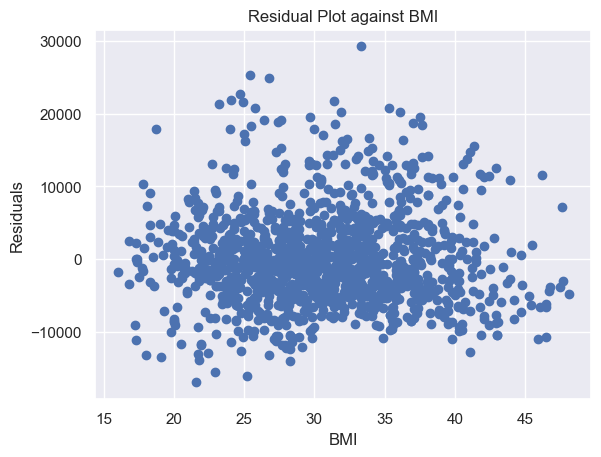

In [29]:
# Create a scatter plot of residuals against the 'bloodpressure' variable
plt.scatter(X['bmi'], residuals)
plt.xlabel("BMI")
plt.ylabel("Residuals")
plt.title("Residual Plot against BMI")

plt.show()

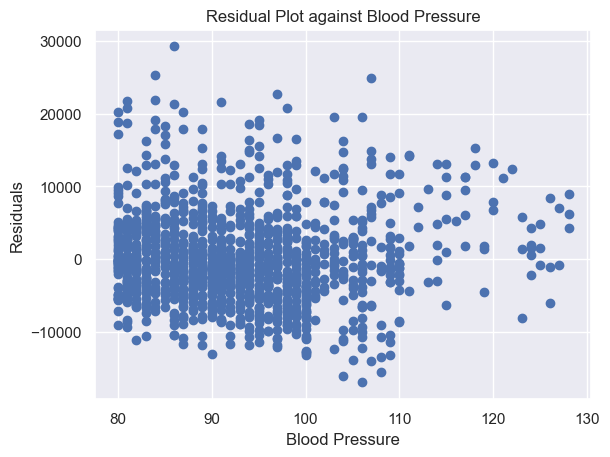

In [30]:
# Create a scatter plot of residuals against the 'bloodpressure' variable
plt.scatter(X['bloodpressure'], residuals)
plt.xlabel("Blood Pressure")
plt.ylabel("Residuals")
plt.title("Residual Plot against Blood Pressure")

plt.show()